In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import os


In [2]:
# sc master - running locally
sc.master

'local[*]'

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Load Data Set CIFAR-10

In [2]:
dataset_path = '/home/hduser/Downloads/CA1-2017156/cifar-10-batches-py' 
#Specify the path to your CIFAR-10 directory

In [4]:
trainset = torchvision.datasets.CIFAR10(root=dataset_path, train=True, download=True, transform=transform)

#Set download=True within the torchvision.datasets.CIFAR10 call:

100.0%


Extracting /home/hduser/Downloads/CA1-2017156/cifar-10-batches-py/cifar-10-python.tar.gz to /home/hduser/Downloads/CA1-2017156/cifar-10-batches-py


In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])

trainset = torchvision.datasets.CIFAR10(root=dataset_path, train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=dataset_path, train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


## Imports

In [6]:
#More imports that I will be using
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## EDA (Exploratory Data Analysis) 

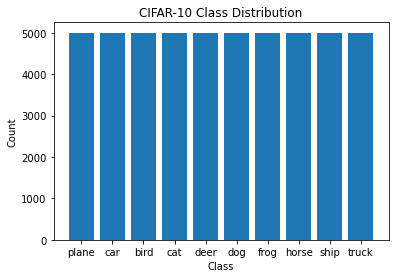

In [16]:
# Get counts for each class
class_counts = np.zeros(10)
for _, label in trainset:
    class_counts[label] += 1

# Plot a bar chart of the counts
plt.bar(classes, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('CIFAR-10 Class Distribution')
plt.show()

#Examining Class Distribution:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

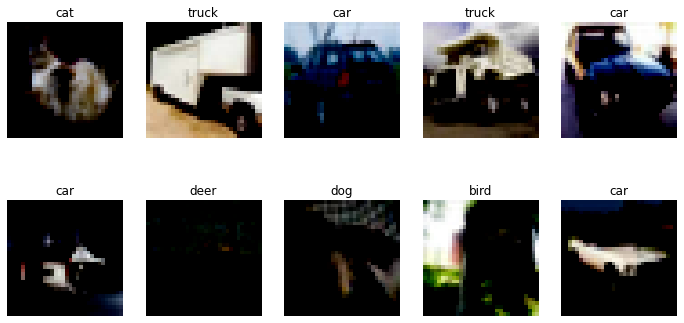

In [9]:
def show_images(images, labels, num_images=10):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(images[i].permute(1, 2, 0))  # Channel dimension first for PyTorch
            ax.set_title(classes[labels[i]])
        ax.axis('off')
    plt.show()

# Get a batch of data
images, labels = next(iter(trainloader)) 
show_images(images, labels)

#Visualizing Sample Images:

# this will display a grid of images, allowing mr to qualitatively 
# inspect what the data looks like and get a sense of the variations within each class.

In [10]:
# Calculate mean and standard deviation per channel (color)
data_mean = trainset.data.mean(axis=(0,1,2)) / 255
data_std = trainset.data.std(axis=(0,1,2)) / 255
print('Mean per channel:', data_mean)
print('Standard deviation per channel:', data_std)

#Computing Statistics
#These statistics help with understanding the image normalization

Mean per channel: [0.49139968 0.48215841 0.44653091]
Standard deviation per channel: [0.24703223 0.24348513 0.26158784]


In [11]:
import pandas as pd

# Sample data with missing values
data = {'A': [1, None, 3], 'B': [4, 5, None], 'C': [None, 7, 8]}
df = pd.DataFrame(data)

# Check for missing values
print(df.isnull().sum())  # count of missing values in each column
print(df.isna().sum())  # similar to isnull()

# Handling missing values (replace with mean)
df['A'].fillna(df['A'].mean(), inplace=True)  # fill 'A' with mean
print(df)


A    1
B    1
C    1
dtype: int64
A    1
B    1
C    1
dtype: int64


/tmp/ipykernel_4523/2631305425.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A'].fillna(df['A'].mean(), inplace=True)  # fill 'A' with mean


     A    B    C
0  1.0  4.0  NaN
1  2.0  5.0  7.0
2  3.0  NaN  8.0


In [12]:
# Sample data with categorical features
data = {'City': ['New York', 'Los Angeles', 'Chicago', 'New York'],
        'Age': [25, 30, 22, 35]}
df = pd.DataFrame(data)

# Get value counts for categorical features
print(df['City'].value_counts())

# Distribution of values within categories (optional)
for city in df['City'].unique():
  city_group = df[df['City'] == city]
  print(city, city_group['Age'].describe())  # age statistics for each city


City
New York       2
Los Angeles    1
Chicago        1
Name: count, dtype: int64
New York count     2.000000
mean     30.000000
std       7.071068
min      25.000000
25%      27.500000
50%      30.000000
75%      32.500000
max      35.000000
Name: Age, dtype: float64
Los Angeles count     1.0
mean     30.0
std       NaN
min      30.0
25%      30.0
50%      30.0
75%      30.0
max      30.0
Name: Age, dtype: float64
Chicago count     1.0
mean     22.0
std       NaN
min      22.0
25%      22.0
50%      22.0
75%      22.0
max      22.0
Name: Age, dtype: float64
